# Pandas Tutorial Part 2

In the second part of the Pandas tutorial we will take a look at how to drop unwantend columns and rows and how to handle and mark missing values in datasets. In addition we will take a closer look at several techniques to combine DataFrames like e.g. merge, join and append.


### Table of Contents

* [1. Dropping data and remove duplicates](#chapter1)
    * [1.1 Drop rows](#section_1_1)
    * [1.2 Drop columns](#section_1_2)
    * [1.3 Drop with cross-tabulation tables](#section_1_3)
    * [1.4 Remove dublicate values](#section_1_4)
        * [1.4.1 Ignore index](#section_1_4_1)
* [2. Merge](#chapter2)
    * [2.1 Merging DataFrames](#section_2_1)
    * [2.2 Merging with joints](#section_2_2)
        * [2.2.1 Inner joint](#section_2_2_1)
        * [2.2.2 Outer joint](#section_2_2_2)
        * [2.2.3 Left joint](#section_2_2_3)
        * [2.2.4 Right joint](#section_2_2_4)
        * [2.2.5 Getting information about the merge source](#section_2_2_5)
* [3. Join and append](#chapter3)
    * [3.1 Join](#section_3_1)
    * [3.2 Append](#section_3_2)
* [4. Handling missing data in Pandas](#chapter4)
    * [4.1 Check for missing data using isna() and notna()](#section_4_1)
    * [4.2 Mark data as NaN](#section_4_2)
    * [4.3 Fill missing data](#section_4_2)
        * [4.3.1 Basic filling options](#section_4_3_1)
            * [4.3.1.1 Use a common value](#section_4_3_1_1)
            * [4.3.1.2 Forward fill row or column](#section_4_3_1_2)
            * [4.3.1.3 Backward fill row or column](#section_4_3_1_3)  
            * [4.3.1.4 Fill with Pandas objects](#section_4_3_1_4)  
        * [4.3.2 Interpolation](#section_4_3_2)
            * [4.3.2.1 Other interpolation methods](#section_4_3_2_1)  
        * [4.3.3 Drop missing values](#section_4_3_3)
            * [4.3.3.1 Drop row with at least 1 missing value](#section_4_3_3_1)  
            * [4.3.3.2 Drop rows with all missing ](#section_4_3_3_2)  
* [5. Conclusion](#chapter5)


# 1. Dropping data and remove dublicates <a class="anchor" id="chapter1"></a>

Most of the times when we work with large datasets, not all information contained is needed. To clean our data, Pandas allows for deleting rows and columns that we don't need.

To show the principle of *dropping* data from a DataFrame, we will read a small dataset containing information about different peoples origin, name, gender, age and haircolor. 

In [387]:
# import pandas library
import pandas as pd
import numpy as np

# used to render images properly on Github
from IPython.display import Image

In [331]:
# read the dataset and convert it to a multi-level indexed DataFrame
df = pd.read_csv('haircolors.csv')

# make a copy of the original DataFrame
df_drop = df.copy()
df_drop

,name,country,gender,age,haircolor
0,Mike,USA,M,24,brown
1,Becky,UK,F,33,blonde
2,Martin,Germany,M,25,black
3,Paul,USA,M,55,brown
4,Julien,France,F,33,blonde
5,Martha,UK,F,44,blonde
6,Adrian,Germany,M,30,black
7,Muriel,France,F,20,brown
8,Eston,USA,M,25,black
9,Bill,USA,M,30,black


## 1.1 Drop rows <a class="anchor" id="section_1_1"></a>

To delete a row from our DataFrame we can use the *drop()* function. To delete a specific row we can use the rows index as the input to the function.

In [332]:
df_drop.drop([5])

,name,country,gender,age,haircolor
0,Mike,USA,M,24,brown
1,Becky,UK,F,33,blonde
2,Martin,Germany,M,25,black
3,Paul,USA,M,55,brown
4,Julien,France,F,33,blonde
6,Adrian,Germany,M,30,black
7,Muriel,France,F,20,brown
8,Eston,USA,M,25,black
9,Bill,USA,M,30,black


We can also drop multiple indexes by providing a list to the drop argument.

In [333]:
df_drop.drop([0,5,7])

,name,country,gender,age,haircolor
1,Becky,UK,F,33,blonde
2,Martin,Germany,M,25,black
3,Paul,USA,M,55,brown
4,Julien,France,F,33,blonde
6,Adrian,Germany,M,30,black
8,Eston,USA,M,25,black
9,Bill,USA,M,30,black


## 1.2 Drop columns <a class="anchor" id="section_1_2"></a>

Dropping columns from a DataFrame works in the same way, but instead of providing an integer index, we need to provide the label of the column we want to drop, as well as the keyword *columns*.

In [334]:
df_drop.drop(columns = ['gender'])

,name,country,age,haircolor
0,Mike,USA,24,brown
1,Becky,UK,33,blonde
2,Martin,Germany,25,black
3,Paul,USA,55,brown
4,Julien,France,33,blonde
5,Martha,UK,44,blonde
6,Adrian,Germany,30,black
7,Muriel,France,20,brown
8,Eston,USA,25,black
9,Bill,USA,30,black


We can also drop several columns.

In [335]:
df_drop.drop(columns = ['gender', 'age'])

,name,country,haircolor
0,Mike,USA,brown
1,Becky,UK,blonde
2,Martin,Germany,black
3,Paul,USA,brown
4,Julien,France,blonde
5,Martha,UK,blonde
6,Adrian,Germany,black
7,Muriel,France,brown
8,Eston,USA,black
9,Bill,USA,black


## 1.3  Drop with cross-tabulation tables <a class="anchor" id="section_1_3"></a>

Now we have seen how to drop rows and columns from our DataFrame. Often we want to sort the data in a DataFrame, to aggregrate information and drop some of it afterwards.
one way to aggregrate information in a DataFrame is to generate a cross-tabulation table using the *crosstab()* function. By default, the crosstab function computes a frequency table using of two (or more) factors.

In [336]:
df_crossDrop = pd.crosstab([df.gender, df.country], df.haircolor)
df_crossDrop

haircolor       black  blonde  brown
gender country                      
F      France       0       1      1
       UK           0       2      0
M      Germany      2       0      0
       USA          2       0      2

Like before, rows and columns can be deleted from the cross-tabulation tab using the *drop()* function.

In [337]:
df_crossDrop.drop(index = 'M')

haircolor       black  blonde  brown
gender country                      
F      France       0       1      1
       UK           0       2      0

We can also drop indexes at different levels. Imagine we want to delete all persons from Germany from our DataFrame. By default the drop(index = ...) function drops the data at index level = 0. To access the country data, we need to access level = 1.

In [338]:
df_crossDrop.drop(index = 'Germany', level = 1)

haircolor       black  blonde  brown
gender country                      
F      France       0       1      1
       UK           0       2      0
M      USA          2       0      2

## 1.4  Remove dublicate values <a class="anchor" id="section_1_4"></a>

To learn how to handle dublicate values in a DataFrame, we create an example dataset containing the names of various persons, as well as some dates, describing when thy start to learn a specific instrument.

In [339]:
# create a new DataFrame
df = pd.DataFrame({
    'name': ['Mike', 'Aaron', 'Becky', 'Mike', 'Bill', 'Mona', 'Greg', 'Greg'],
    'instruments': ['guitar', 'violon', 'trumpet', 'drums', 'cello', 'flute', 'bongo', 'tabla'],
    'date': ['Feb 8, 2019', 'Apr 10, 2021', 'Sep 10, 2021', 
             'Mar 25, 2020', 'Nov 12, 2019', 'Jan 10, 2022', 
             'Oct 13, 2019', 'Dec 24, 2018']
})

# change data to dateTime format
df.date = pd.to_datetime(df.date)

df

,name,instruments,date
0,Mike,guitar,2019-02-08
1,Aaron,violon,2021-04-10
2,Becky,trumpet,2021-09-10
3,Mike,drums,2020-03-25
4,Bill,cello,2019-11-12
5,Mona,flute,2022-01-10
6,Greg,bongo,2019-10-13
7,Greg,tabla,2018-12-24


We can now use Pandas *drop_dublicate()* function to remove any dublicate values contained in our DataFrame:

```python
DataFrame.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)
```

In [340]:
df.drop_duplicates(subset = 'name')

,name,instruments,date
0,Mike,guitar,2019-02-08
1,Aaron,violon,2021-04-10
2,Becky,trumpet,2021-09-10
4,Bill,cello,2019-11-12
5,Mona,flute,2022-01-10
6,Greg,bongo,2019-10-13


We succesfully dropped all dublicates from our DataFrame.
**Note:** By default the *keep* argument of the *drop_dublicates()* function is True, meaning that Pandas keeps the **first** occurence of an entry and removes the others.

To remove dublicates completely, the *keep* argument can be set to False.

In [341]:
df.drop_duplicates(subset = 'name', keep = False)

,name,instruments,date
1,Aaron,violon,2021-04-10
2,Becky,trumpet,2021-09-10
4,Bill,cello,2019-11-12
5,Mona,flute,2022-01-10


Both Greg and Mike have been removed completely from the DataFrame.

### 1.4.1  Ignore index <a class="anchor" id="section_1_4.1"></a>

From the previous examples you can see that dublicate values can be removed from a DataFrame using the *remove_dublicates()* function. Nevertheless, the index values become non-sequential.
This issue can be solved by using the *ignore_index* argument of the *drop_dublicates()* function.

In [342]:
df.drop_duplicates(subset = 'name', ignore_index = True)

,name,instruments,date
0,Mike,guitar,2019-02-08
1,Aaron,violon,2021-04-10
2,Becky,trumpet,2021-09-10
3,Bill,cello,2019-11-12
4,Mona,flute,2022-01-10
5,Greg,bongo,2019-10-13


Setting ignore_index = True, returns a DataFrame with removed dublicates and a sequential order.

# 2. Merge <a class="anchor" id="chapter2"></a>

Pandas *merge()* function can be used to combine two DataFrames. 
But wait... We already know how to do this! In the first part of this tutorial we used the the *concat()* function to combine DataFrames and Series. 

What is the difference then between *merge()* and *concat()*?

One key difference is that merge combines **exactly** two DataFrames based on a column value, while concatenation of **two or more** DataFrames is performed based on the axis option.
In addition, merge is very similiar to database join functionality using inner, outer, left or right joint.

In [343]:
# create first DataFrame
scores_1 = {
        "subject": ['math', 'physics', 'chemistry', 'biology'],
        "sem1": [60, 70, 80, 80]
}

sem1_df = pd.DataFrame(scores_1)
sem1_df   

,subject,sem1
0,math,60
1,physics,70
2,chemistry,80
3,biology,80


In [344]:
# create second DataFrame
scores_2 = {
        "subject": ['math', 'physics', 'chemistry', 'biology'],
        "sem2": [73, 81, 88, 83]
}

sem2_df = pd.DataFrame(scores_2)
sem2_df   

,subject,sem2
0,math,73
1,physics,81
2,chemistry,88
3,biology,83


## 2.1 Merging DataFrames <a class="anchor" id="section_2_1"></a>

In [345]:
pd.merge(sem1_df, sem2_df, on = "subject")


,subject,sem1,sem2
0,math,60,73
1,physics,70,81
2,chemistry,80,88
3,biology,80,83


## 2.2 Merging with joints <a class="anchor" id="section_2_2"></a>

### 2.2.1 Inner joint <a class="anchor" id="section_2_2_1"></a>

A merge using inner joints returns records that have matching values in both tables. Records with no match are discarded.

![Inner Joint](images/inner_joint.PNG "Inner Joint")

In [392]:
# create first DataFrame
scores_1 = {
        "subject": ['math', 'physics', 'chemistry', 'literature'],
        "sem1": [60, 70, 80, 55]
}

sem1_df = pd.DataFrame(scores_1)

# create second DataFrame
scores_2 = {
        "subject": ['physics', 'chemistry', 'math', 'biology', 'computers'],
        "sem2": [73, 81, 88, 83, 88]
}
sem2_df = pd.DataFrame(scores_2)

pd.merge(sem1_df, sem2_df, on = "subject")


,subject,sem1,sem2
0,math,60,88
1,physics,70,73
2,chemistry,80,81


### 2.2.2 Outer joint <a class="anchor" id="section_2_2_2"></a>

A merge with outer join returns all rows of both DataFrames. For rows with no corresponding values a NaN value is generated.

![Outer Joint](images/outer_joint.PNG "Inner Joint")

In [347]:
pd.merge(sem1_df, sem2_df, on = "subject", how = "outer")

,subject,sem1,sem2
0,math,60.0,88.0
1,physics,70.0,73.0
2,chemistry,80.0,81.0
3,literature,55.0,NaN
4,biology,NaN,83.0
5,computers,NaN,88.0


### 2.2.3 Left joint <a class="anchor" id="section_2_2_3"></a>

A merge with outer join returns all rows from the first provided (left) DataFrame, and the matched records from the second provided (right) DataFrame.

![Left Joint](images/left_joint.PNG "Left Joint")

In [348]:
pd.merge(sem1_df, sem2_df, on = "subject", how = "left")

,subject,sem1,sem2
0,math,60,88.0
1,physics,70,73.0
2,chemistry,80,81.0
3,literature,55,NaN


### 2.2.4 Right joint <a class="anchor" id="section_2_2_4"></a>

A merge with outer join returns all rows from the first provided (right) DataFrame, and the matched records from the second provided (left) DataFrame.

![Right Joint](images/right_joint.PNG "Right Joint")

In [349]:
pd.merge(sem1_df, sem2_df, on = "subject", how = "right")

,subject,sem1,sem2
0,physics,70.0,73
1,chemistry,80.0,81
2,math,60.0,88
3,biology,NaN,83
4,computers,NaN,88


### 2.2.5 Getting information about the merge source <a class="anchor" id="section_2_2_5"></a>

Sometimes we want to know the source of the merge operation. This information can be obtained by seetting the *indicator* argument of the *merge()* function equal to True.

In [350]:
pd.merge(sem1_df, sem2_df, on = "subject", how = "outer", indicator = True)

,subject,sem1,sem2,_merge
0,math,60.0,88.0,both
1,physics,70.0,73.0,both
2,chemistry,80.0,81.0,both
3,literature,55.0,NaN,left_only
4,biology,NaN,83.0,right_only
5,computers,NaN,88.0,right_only


Here we can see that there are entries for math, physics and chemistry in both the first and the second DataFrame. Entries for biology and computers are found in the right (second) DataFrame, while entries for literature are found in the left (first) DataFrame only. 

# 3. Join and append <a class="anchor" id="chapter3"></a>

We have already seen two different ways to combine two (or more) DataFrames:

- Concatenation and
- Merge

We will now briefly look at two alternative ways for combining DataFrames:

- Join and
- Append


In [351]:
sem1_df = sem1_df.set_index("subject")
sem1_df

,sem1
subject,
math,60
physics,70
chemistry,80
literature,55


In [352]:
sem2_df = sem2_df.set_index("subject")
sem2_df

,sem2
subject,
physics,73
chemistry,81
math,88
biology,83
computers,88


## 3.1 Join <a class="anchor" id="section_3_1"></a>

Join can be used to combine two DataFrames which are differently indexed. By default, join uses *inner join*. Nevertheless, join can be used with:

- inner join
- outer join
- left join and 
- right join

In [353]:
sem1_df.join(sem2_df)

,sem1,sem2
subject,,
math,60,88.0
physics,70,73.0
chemistry,80,81.0
literature,55,NaN


In [354]:
sem1_df.join(sem2_df, how = 'outer')

,sem1,sem2
subject,,
biology,NaN,83.0
chemistry,80.0,81.0
computers,NaN,88.0
literature,55.0,NaN
math,60.0,88.0
physics,70.0,73.0


In [355]:
sem1_df.join(sem2_df, how = 'left')

,sem1,sem2
subject,,
math,60,88.0
physics,70,73.0
chemistry,80,81.0
literature,55,NaN


In [356]:
sem1_df.join(sem2_df, how = 'right')

,sem1,sem2
subject,,
physics,70.0,73
chemistry,80.0,81
math,60.0,88
biology,NaN,83
computers,NaN,88


## 3.2 Append <a class="anchor" id="section_3_2"></a>

Append is a further option for combining DataFrames, 
Append can be used to combine two (or more) DataFrames row-wise, and can be seen as a shortcut method to the *concat()* function with concatenation along axis 0. 

**Note: At the time writing the append method is going to be deprecated in the next version**

In [357]:
sem1_df.append(sem2_df)

C:\Users\167490\AppData\Local\Temp\ipykernel_24164\561503557.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sem1_df.append(sem2_df)


,sem1,sem2
subject,,
math,60.0,NaN
physics,70.0,NaN
chemistry,80.0,NaN
literature,55.0,NaN
physics,NaN,73.0
chemistry,NaN,81.0
math,NaN,88.0
biology,NaN,83.0
computers,NaN,88.0


# 4. Handling missing data in Pandas <a class="anchor" id="chapter4"></a>

Usually most datasets are incomplete and contain missing values, which we need to take care of before e.g. training a machine learning model. Missing data come in several flavors like:

- Not-a-Number (NaN) entries
- 'Missing' or
- 'Not available'

Lets create a simple toy dataset with NaN values and see which options Pandas provides to handle these missing values.

In [358]:
df = pd.DataFrame(
    np.random.randn(5, 3),
    index=["a", "c", "e", "f", "h"],
    columns=["one", "two", "three"],
)

df["four"] = "bar"
df["five"] = df["one"] > 0

df = df.reindex(["a", "b", "c", "d", "e", "f", "g", "h"])
df

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.516531,0.022292,0.500967,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,1.073964,0.158126,0.143894,bar,True


## 4.1 Check for missing data using isna() and notna() <a class="anchor" id="section_4_1"></a>

To check if a specific column or the entire DataFrame has missing values we can use the *na()* and the *notna()* functions.
Lets start by checking it column three contains missing values.

In [359]:
pd.isna(df['two'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: two, dtype: bool

The function returns a table with True and False entries, where True means that a value is NaN and False means not NaN.

We can use the same function to check for NaN values in the entire DataFrame. 

In [360]:
pd.isna(df)

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


Alternatively we can use the *notna()* function, which returns True if the value is not NaN and False if the value is NaN.

In [361]:
pd.notna(df)

,one,two,three,four,five
a,True,True,True,True,True
b,False,False,False,False,False
c,True,True,True,True,True
d,False,False,False,False,False
e,True,True,True,True,True
f,True,True,True,True,True
g,False,False,False,False,False
h,True,True,True,True,True


## 4.2 Mark data as NaN <a class="anchor" id="section_4_1"></a>

In some datasets it is not obvious if there are some missing values, as not all missing data is indicated with NaN. Sometime garbage data is just labeled with a replacement string like 'missing' or 'not available'. A first important step is to check your dataset and see if it contains any garbage data. Once identified, this data can be replaced with a NaN value using the Pandas *replace()* function.

In [362]:
df_ = pd.DataFrame({'A':[2, 3.3, 'xxx', 3.7, 7.6, 8.8],
                    'B':[1.25, 'xxx', 'xxx', 4.3, 14.23, 16.4]})

df_

,A,B
0,2,1.25
1,3.3,xxx
2,xxx,xxx
3,3.7,4.3
4,7.6,14.23
5,8.8,16.4


In the above example, missing data is labeled with the string 'xxx'. Lets use the *replace()* function to mark this data as NaN.

In [363]:
df_.replace('xxx', np.nan)

,A,B
0,2.0,1.25
1,3.3,NaN
2,NaN,NaN
3,3.7,4.30
4,7.6,14.23
5,8.8,16.40


## 4.3 Fill missing data <a class="anchor" id="section_4_3"></a>

There are several different techniques to fill in the missing. Pandas has a build-in function called *fillna()*, which can take care of this process.

### 4.3.1 Basic filling options <a class="anchor" id="section_4_3_1"></a>

#### 4.3.1.1 Use a common value <a class="anchor" id="section_4_3_1_1"></a>

In [364]:
df.fillna(0)

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,0.000000,0.000000,0.000000,0,0
c,-0.516531,0.022292,0.500967,bar,False
d,0.000000,0.000000,0.000000,0,0
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,0.000000,0.000000,0.000000,0,0
h,1.073964,0.158126,0.143894,bar,True


If you use the *fillna()* function and a common value of 0, we see that all missing values get a value if 0. This works for most of the entries, but not for the last two columns (four, five). Here we probably want to replace missing values with 'bar' or True/False values. 
Luckily we can assign different 'common' values for each inidviduell column.df.fillna({"one": 0, "two": 0, "three": 0, "four": 'bar', "five": True}) 

In [365]:
df.fillna({"one": 0, "two": 0, "three": 0, "four": 'bar', "five": True}) 

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,0.000000,0.000000,0.000000,bar,True
c,-0.516531,0.022292,0.500967,bar,False
d,0.000000,0.000000,0.000000,bar,True
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,0.000000,0.000000,0.000000,bar,True
h,1.073964,0.158126,0.143894,bar,True


### 4.3.1.2 Forward fill row or column <a class="anchor" id="section_4_3_1_2"></a>

A different way to fill in missing data is the so called forward fill method. Missing values get the same value as the entry before them. The *before* value can either be the value of the column or the row before.

In [366]:
# forward fill row
df.fillna(method = 'ffill')

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,-0.439913,3.584931,0.686814,bar,False
c,-0.516531,0.022292,0.500967,bar,False
d,-0.516531,0.022292,0.500967,bar,False
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,-1.243921,-1.324733,0.895383,bar,False
h,1.073964,0.158126,0.143894,bar,True


In [367]:
# forward fill column
df.fillna(method = 'ffill', axis = 'columns')

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.516531,0.022292,0.500967,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,1.073964,0.158126,0.143894,bar,True


From this example you can see that the column-wise forward fill is not appropriated in our case, as some rows already start with a NaN value. One solution would be to first use a row-wise forward fill and then a column-wise one.

In [368]:
# forward fill row
temp_df = df.fillna({"one": 0})
temp_df.fillna(method = 'ffill', axis = 'columns')

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,0.0,0.0,0.0,0.0,0.0
c,-0.516531,0.022292,0.500967,bar,False
d,0.0,0.0,0.0,0.0,0.0
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,0.0,0.0,0.0,0.0,0.0
h,1.073964,0.158126,0.143894,bar,True


### 4.3.1.3 Backward fill row or column <a class="anchor" id="section_4_3_1_3"></a>

The complement to the above shown fill forward method is the backward fill. Missing data is replaced with the value of the entry below them.

In [369]:
# backward fill row-wise
df.fillna(method = 'bfill')

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,-0.516531,0.022292,0.500967,bar,False
c,-0.516531,0.022292,0.500967,bar,False
d,-0.818421,-0.541674,3.353498,bar,False
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,1.073964,0.158126,0.143894,bar,True
h,1.073964,0.158126,0.143894,bar,True


We can do the same, just using columns instead.

In [370]:
# backward fill column-wise
df.fillna(method = 'bfill', axis='columns')

,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.516531,0.022292,0.500967,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,NaN,NaN,NaN,NaN,NaN
h,1.073964,0.158126,0.143894,bar,True


Here we get the same problem as with the forward column-wise fill. If a column already start with a NaN value, then this value gets propagate. So be careful with that!

### 4.3.1.4 Fill with Pandas objects <a class="anchor" id="section_4_3_1_4"></a>

We can also use Pandas objects like *sum(), mean(), max() or min()* to fill missing values.

In [371]:
df.fillna(df.mean())

C:\Users\167490\AppData\Local\Temp\ipykernel_24164\634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,-0.388964,0.379789,1.116111,NaN,0.2
c,-0.516531,0.022292,0.500967,bar,False
d,-0.388964,0.379789,1.116111,NaN,0.2
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,-0.388964,0.379789,1.116111,NaN,0.2
h,1.073964,0.158126,0.143894,bar,True


**Note** The *mean()* function does not work for string variables like 'bar' or for the column containing True and False values. Instead of using the mean() function on the whole DataFrame, we can select a specific range for which the function should be applied.

In [372]:
df.fillna(df.mean()['one':'three'])

C:\Users\167490\AppData\Local\Temp\ipykernel_24164\2631146933.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean()['one':'three'])


,one,two,three,four,five
a,-0.439913,3.584931,0.686814,bar,False
b,-0.388964,0.379789,1.116111,NaN,NaN
c,-0.516531,0.022292,0.500967,bar,False
d,-0.388964,0.379789,1.116111,NaN,NaN
e,-0.818421,-0.541674,3.353498,bar,False
f,-1.243921,-1.324733,0.895383,bar,False
g,-0.388964,0.379789,1.116111,NaN,NaN
h,1.073964,0.158126,0.143894,bar,True


### 4.3.2 Interpolation <a class="anchor" id="section_4_3_2"></a>

We have now seen some basic options to fill in missing values. Another option is to use interpolation using the *interpolate()* function. By default, Pandas uses linear interpolation. Nevertheless there are several other interpolation methods available, like e.g.:

- Linear 
- Barycentric 
- Pchip 
- Akima 
- Spline 
- Polynomial 

For this part of the tutorial we will drop the last two columns of our DataFrame.

In [373]:
df = df.drop(columns = ['four', 'five'])
df

,one,two,three
a,-0.439913,3.584931,0.686814
b,NaN,NaN,NaN
c,-0.516531,0.022292,0.500967
d,NaN,NaN,NaN
e,-0.818421,-0.541674,3.353498
f,-1.243921,-1.324733,0.895383
g,NaN,NaN,NaN
h,1.073964,0.158126,0.143894


In [374]:
# use linear interpolation
df.interpolate()

,one,two,three
a,-0.439913,3.584931,0.686814
b,-0.478222,1.803612,0.593890
c,-0.516531,0.022292,0.500967
d,-0.667476,-0.259691,1.927232
e,-0.818421,-0.541674,3.353498
f,-1.243921,-1.324733,0.895383
g,-0.084978,-0.583303,0.519639
h,1.073964,0.158126,0.143894


Linear interpolation estimates a new value by connecting two adjacent known values with a straigt line. We can visualize the interpolation in Pandas using the *.plot()* command.

<AxesSubplot:title={'center':'linear interpolation'}>

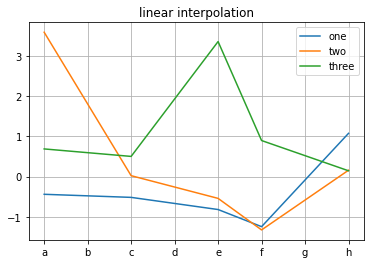

In [375]:
# use linear interpolation and visualize the result
df.interpolate().plot(title = 'linear interpolation', grid = 1)

#### 4.3.2.1 Other interpolation methods <a class="anchor" id="section_4_3_2_1"></a>

In [376]:
df_ = pd.DataFrame({'A':[2, 3.3, np.nan, 3.7, 7.6, 8.8],
                    'B':[1.25, np.nan, np.nan, 4.3, 14.23, 16.4]})

df_

,A,B
0,2.0,1.25
1,3.3,NaN
2,NaN,NaN
3,3.7,4.30
4,7.6,14.23
5,8.8,16.40


In [377]:
# linear interpolation
df_.interpolate()

,A,B
0,2.0,1.250000
1,3.3,2.266667
2,3.5,3.283333
3,3.7,4.300000
4,7.6,14.230000
5,8.8,16.400000


In [378]:
# barycentric interpolation
df_.interpolate(method = 'barycentric')

,A,B
0,2.00,1.25
1,3.30,-9.52
2,2.23,-6.06
3,3.70,4.30
4,7.60,14.23
5,8.80,16.40


In [379]:
# pchip interpolation
df_.interpolate(method = 'pchip')

,A,B
0,2.000000,1.250000
1,3.300000,1.566495
2,3.488632,2.560768
3,3.700000,4.300000
4,7.600000,14.230000
5,8.800000,16.400000


In [380]:
# akima interpolation
df_.interpolate(method = 'akima')

,A,B
0,2.000000,1.250000
1,3.300000,-0.772951
2,3.444216,0.175210
3,3.700000,4.300000
4,7.600000,14.230000
5,8.800000,16.400000


In [381]:
# spline interpolation
df_.interpolate(method = 'spline', order = 2)

,A,B
0,2.000000,1.250000
1,3.300000,-0.855010
2,3.440909,0.547068
3,3.700000,4.300000
4,7.600000,14.230000
5,8.800000,16.400000


In [382]:
# polynomial interpolation
df_.interpolate(method = 'polynomial', order = 2)

,A,B
0,2.000000,1.250000
1,3.300000,-3.129744
2,2.905405,-2.113077
3,3.700000,4.300000
4,7.600000,14.230000
5,8.800000,16.400000


<AxesSubplot:title={'center':'polynomial interpolation'}>

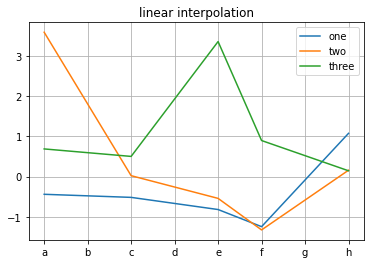

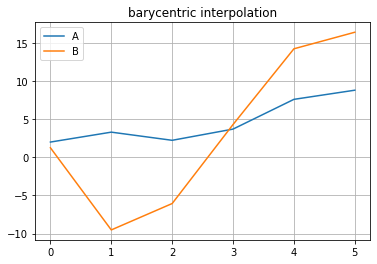

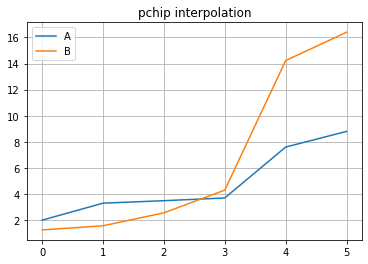

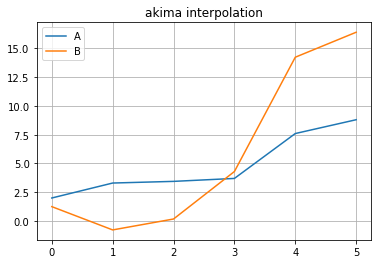

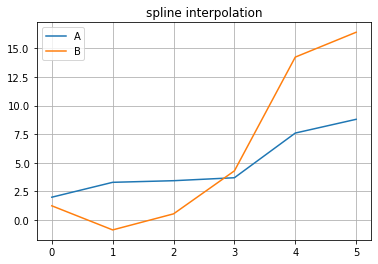

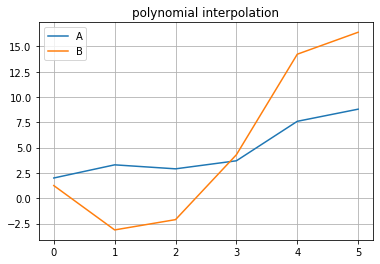

In [383]:
# use linear interpolation and visualize the result
df.interpolate().plot(title = 'linear interpolation', grid = 1)
df_.interpolate(method = 'barycentric').plot(title = 'barycentric interpolation', grid = 1)
df_.interpolate(method = 'pchip').plot(title = 'pchip interpolation', grid = 1)
df_.interpolate(method = 'akima').plot(title = 'akima interpolation', grid = 1)
df_.interpolate(method = 'spline', order = 2).plot(title = 'spline interpolation', grid = 1)
df_.interpolate(method = 'polynomial', order = 2).plot(title = 'polynomial interpolation', grid = 1)

### 4.3.3 Drop missing values <a class="anchor" id="section_4_3_3"></a>

Instead of filling missing data points with values, we can also drop these missing values.

In [384]:
df = pd.DataFrame({'A':[2, 3.3, np.nan, 3.7, 7.6, 8.8],
                    'B':[1.25, np.nan, np.nan, 4.3, 14.23, 16.4]})

df

,A,B
0,2.0,1.25
1,3.3,NaN
2,NaN,NaN
3,3.7,4.30
4,7.6,14.23
5,8.8,16.40


#### 4.3.3.1 Drop row with at least 1 missing value <a class="anchor" id="section_4_3_3_1"></a>

In [385]:
df.dropna()

,A,B
0,2.0,1.25
3,3.7,4.30
4,7.6,14.23
5,8.8,16.40


#### 4.3.3.2 Drop rows with all missing  <a class="anchor" id="section_4_3_3_2"></a>

In [386]:
df.dropna(how = 'all')

,A,B
0,2.0,1.25
1,3.3,NaN
3,3.7,4.30
4,7.6,14.23
5,8.8,16.40


# 5. Conclusion <a class="anchor" id="chapter5"></a>

In this Pandas tutorial we looked at different ways of combining DataFrames, like e.g. merge, append and join. Furthermore we learned about how to handle missing data in our datasets and how to drop unwantend columns and rows.